In [1]:
#Load important libraries
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import pandas as pd
from pandas import json_normalize
import numpy as np
import requests

In [2]:
#Load in all match events 
events = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/8658.json')
events = events.json()

#Transform JSON into a dataframe 
df = json_normalize(events, sep = "_")

In [3]:
# Excluding (...) for large number of columns
pd.set_option("display.max.columns", None)

df.head(5)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,duel_type_id,duel_type_name,pass_aerial_won,duel_outcome_id,duel_outcome_name,counterpress,interception_outcome_id,interception_outcome_name,pass_switch,pass_cross,dribble_outcome_id,dribble_outcome_name,foul_committed_type_id,foul_committed_type_name,foul_won_defensive,clearance_aerial_won,ball_recovery_recovery_failure,foul_committed_advantage,foul_won_advantage,injury_stoppage_in_chain,pass_backheel,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_technique_id,shot_technique_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_body_part_id,shot_body_part_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_outcome_id,goalkeeper_outcome_name,foul_committed_card_id,foul_committed_card_name,pass_goal_assist,shot_deflected,block_deflection,foul_committed_penalty,pass_cut_back,shot_aerial_won,shot_first_time,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,pass_deflected,dribble_overrun,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name
0,47638847-fd43-4656-b49c-cff64e5cfc0a,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,771,France,1,Regular Play,771,France,442.0,"[{'player': {'id': 3099, 'name': 'Hugo Lloris'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0c04305d-5615-4520-9be5-7c232829954b,2,1,00:00:00.000,0,0,1,1.412,35,Starting XI,771,France,1,Regular Play,785,Croatia,433.0,"[{'player': {'id': 3444, 'name': 'Danijel Suba...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c5e17439-efe2-480b-9cff-1600998674d7,3,1,00:00:00.000,0,0,1,0.000,18,Half Start,771,France,1,Regular Play,771,France,NaN,NaN,[7e1460eb-c572-4059-8cd4-cec4857f818d],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7e1460eb-c572-4059-8cd4-cec4857f818d,4,1,00:00:00.000,0,0,1,0.000,18,Half Start,771,France,1,Regular Play,785,Croatia,NaN,NaN,[c5e17439-efe2-480b-9cff-1600998674d7],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,918ffaaf-3cee-41e5-87e2-4bcc8d43a859,5,1,00:00:00.400,0,0,2,1.159,30,Pass,785,Croatia,9,From Kick Off,785,Croatia,NaN,NaN,[329cb470-9b7a-4b19-b8d2-50fa902295af],"[61.0, 41.0]",5472.0,M

In [4]:
#Filtering passes made by France

france_passes = df.loc[(df['type_name'] == 'Pass') & (df['team_name'] == "France")]

In [5]:
#Let's look what we got

france_passes.head(5)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,duel_type_id,duel_type_name,pass_aerial_won,duel_outcome_id,duel_outcome_name,counterpress,interception_outcome_id,interception_outcome_name,pass_switch,pass_cross,dribble_outcome_id,dribble_outcome_name,foul_committed_type_id,foul_committed_type_name,foul_won_defensive,clearance_aerial_won,ball_recovery_recovery_failure,foul_committed_advantage,foul_won_advantage,injury_stoppage_in_chain,pass_backheel,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_technique_id,shot_technique_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_body_part_id,shot_body_part_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_outcome_id,goalkeeper_outcome_name,foul_committed_card_id,foul_committed_card_name,pass_goal_assist,shot_deflected,block_deflection,foul_committed_penalty,pass_cut_back,shot_aerial_won,shot_first_time,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,pass_deflected,dribble_overrun,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name
23,d6184de7-e045-41f1-acc2-4ada854e90fb,24,1,00:00:13.627,0,13,2,3.053,30,Pass,785,Croatia,9,From Kick Off,771,France,NaN,NaN,"[395527d3-4a33-46a3-ac4f-ac84cc71c41a, 3b53967...","[48.0, 50.0]",5485.0,Raphaël Varane,3.0,Right Center Back,NaN,NaN,10.000000,1.570796,3.0,High Pass,"[48.0, 60.0]",66.0,Recovery,NaN,NaN,NaN,True,9.0,Incomplete,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,95f14d96-c748-411a-ab65-e6de890e0651,66,1,00:00:54.747,0,54,3,1.400,30,Pass,771,France,4,From Throw In,771,France,NaN,NaN,[380e5930-e955-4526-9fc4-ebaed34a8303],"[49.0, 80.0]",5476.0,Benjamin Pavard,2.0,Right Back,3961.0,"N""Golo Kanté",19.235384,-1.727398,2.0,Low Pass,"[46.0, 61.0]",67.0,Throw-in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,80813884-4cf0-494d-aa5f-cd524a95d240,70,1,00:00:56.507,0,56,3,2.680,30,Pass,771,France,4,From Throw In,771,France,NaN,NaN,"[3cd35756-c5da-4263-8cce-0f627bcf729b, cb987ae...","[65.0, 64.0]",3961.0,"N""Golo Kanté",11.0,Left Defensive Midfield,20004.0,Paul Pogba,5.099019,1.373401,3.0,High Pass,"[66.0, 69.0]",NaN,NaN,40.0,Right Foot,NaN,True,9.0,Incomplete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,6a2fe4f0-d5cf-4628-9752-fb57e2b35516,78,1,00:01:01.947,1,1,3,0.560,30,Pass,771,France,4,From Throw In,771,France,NaN,NaN,[021244ed-a8a3-47a5-87c3-412987d42cc4],"[63.0, 73.0]",5487.0,Antoine Griezmann,22.0,Right Center Forward,3009.0,Kylian Mbappé Lottin,6.324555,1.249046,1.0,Ground Pass,"[65.0, 79.0]",NaN,NaN,38.0,Left Foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Text(0.5, 1.0, 'France Passes')

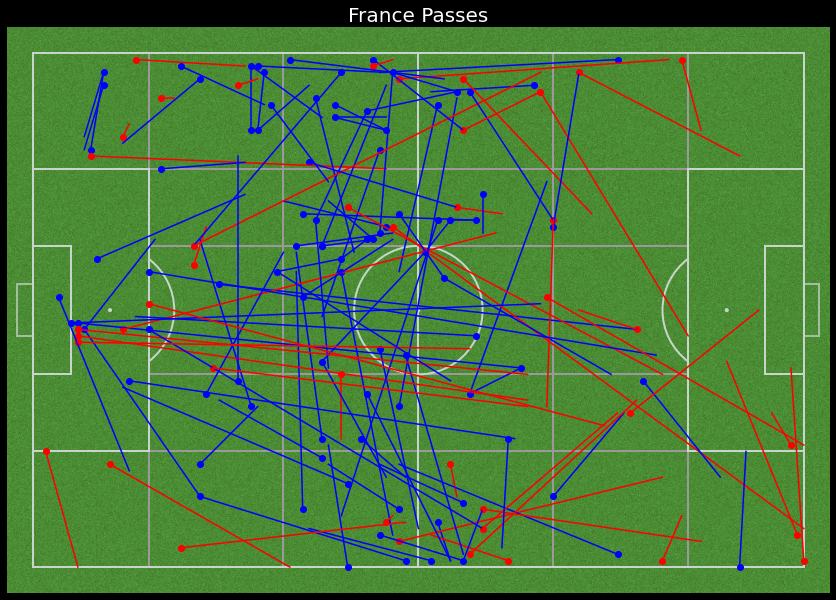

In [6]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal', positional=True, positional_color='#9A9A9A',
              pitch_color='grass', line_color='#c7d5cc', goal_type='box',
              constrained_layout=True, tight_layout=False)

pitch.draw(ax=ax)

#plt.gca().invert_yaxis()

#for x in range(15):
for x in range(len(france_passes['id'])):
    if france_passes['period'].iloc[x] == 1:
        if any([france_passes['pass_outcome_name'].iloc[x] == 'Incomplete', france_passes['pass_outcome_name'].iloc[x] == 'Out', 
                france_passes['pass_outcome_name'].iloc[x] == 'Unknown', france_passes['pass_outcome_name'].iloc[x] == 'Pass Offside',
                france_passes['pass_outcome_name'].iloc[x] == 'Injury Clearance']):
            plt.plot((france_passes['location'].iloc[x][0],france_passes['pass_end_location'].iloc[x][0]),\
                     (france_passes['location'].iloc[x][1],france_passes['pass_end_location'].iloc[x][1]),color='red')
            plt.scatter(france_passes['location'].iloc[x][0],france_passes['location'].iloc[x][1],color='red')
        else:
            plt.plot((france_passes['location'].iloc[x][0],france_passes['pass_end_location'].iloc[x][0]),\
                     (france_passes['location'].iloc[x][1],france_passes['pass_end_location'].iloc[x][1]),color='blue')
            plt.scatter(france_passes['location'].iloc[x][0],france_passes['location'].iloc[x][1],color='blue')
    
plt.title('France Passes',color='white',size=20)

Text(0.5, 1.0, 'Hugo Lloris Passes')

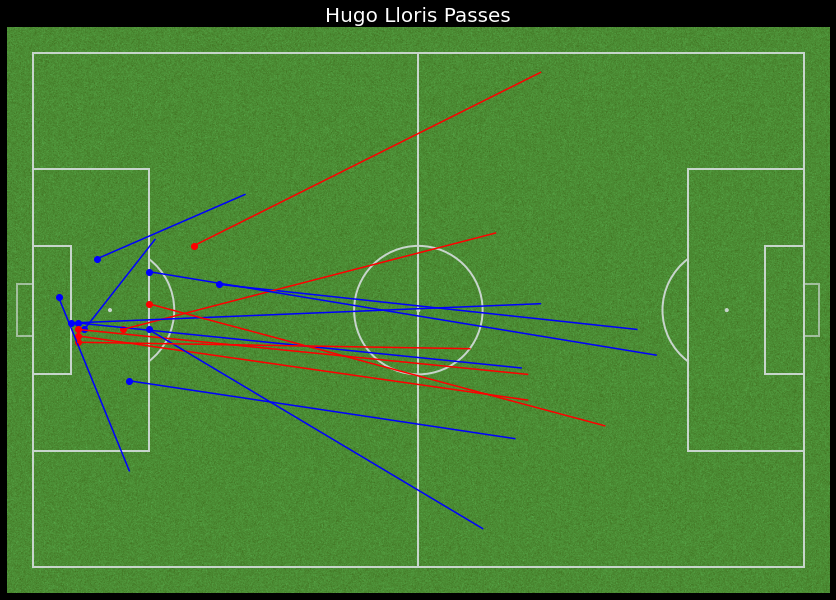

In [7]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
#ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal', goal_type='box',
              pitch_color='grass', line_color='#c7d5cc',
              constrained_layout=True, tight_layout=False)

pitch.draw(ax=ax)
#plt.gca().invert_yaxis()

#for x in range(15):
for x in range(len(france_passes['id'])):
    if (france_passes['player_name'].iloc[x] == 'Hugo Lloris') & (france_passes['period'].iloc[x] == 1):
        if any([france_passes['pass_outcome_name'].iloc[x] == 'Incomplete', france_passes['pass_outcome_name'].iloc[x] == 'Out', 
                france_passes['pass_outcome_name'].iloc[x] == 'Unknown', france_passes['pass_outcome_name'].iloc[x] == 'Pass Offside',
                france_passes['pass_outcome_name'].iloc[x] == 'Injury Clearance']):
            plt.plot((france_passes['location'].iloc[x][0],france_passes['pass_end_location'].iloc[x][0]),\
                     (france_passes['location'].iloc[x][1],france_passes['pass_end_location'].iloc[x][1]),color='red')
            plt.scatter(france_passes['location'].iloc[x][0],france_passes['location'].iloc[x][1],color='red')
        else:
            plt.plot((france_passes['location'].iloc[x][0],france_passes['pass_end_location'].iloc[x][0]),\
                     (france_passes['location'].iloc[x][1],france_passes['pass_end_location'].iloc[x][1]),color='blue')
            plt.scatter(france_passes['location'].iloc[x][0],france_passes['location'].iloc[x][1],color='blue')
    
plt.title('Hugo Lloris Passes',color='white',size=20)


In [8]:
Griezmann_passes = france_passes.loc[france_passes['player_name'] == 'Antoine Griezmann']
Griezmann_passes

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,duel_type_id,duel_type_name,pass_aerial_won,duel_outcome_id,duel_outcome_name,counterpress,interception_outcome_id,interception_outcome_name,pass_switch,pass_cross,dribble_outcome_id,dribble_outcome_name,foul_committed_type_id,foul_committed_type_name,foul_won_defensive,clearance_aerial_won,ball_recovery_recovery_failure,foul_committed_advantage,foul_won_advantage,injury_stoppage_in_chain,pass_backheel,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_technique_id,shot_technique_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_body_part_id,shot_body_part_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_outcome_id,goalkeeper_outcome_name,foul_committed_card_id,foul_committed_card_name,pass_goal_assist,shot_deflected,block_deflection,foul_committed_penalty,pass_cut_back,shot_aerial_won,shot_first_time,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,pass_deflected,dribble_overrun,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name
77,6a2fe4f0-d5cf-4628-9752-fb57e2b35516,78,1,00:01:01.947,1,1,3,0.560,30,Pass,771,France,4,From Throw In,771,France,NaN,NaN,[021244ed-a8a3-47a5-87c3-412987d42cc4],"[63.0, 73.0]",5487.0,Antoine Griezmann,22.0,Right Center Forward,3009.0,Kylian Mbappé Lottin,6.324555,1.249046,1.0,Ground Pass,"[65.0, 79.0]",NaN,NaN,38.0,Left Foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499,0e985821-b97b-4232-b99c-f6d546b8c9cb,500,1,00:12:20.467,12,20,29,1.440,30,Pass,771,France,1,Regular Play,771,France,NaN,NaN,[bd928ae4-9d3c-4dc7-9861-453d6f37a64b],"[66.0, 6.0]",5487.0,Antoine Griezmann,22.0,Right Center Forward,4375.0,Blaise Matuidi,14.317822,2.930499,1.0,Ground Pass,"[52.0, 9.0]",NaN,NaN,40.0,Right Foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,284aebed-bea1-481e-b7cd-a1cbe0c5561e,649,1,00:16:33.787,16,33,38,2.320,30,Pass,771,France,1,Regular Play,771,France,NaN,NaN,[e84a5a3b-359b-4cb4-b2f6-ee6642f196e4],"[95.0, 51.0]",5487.0,Antoine Griezmann,22.0,Right Center Forward,3009.0,Kylian Mbappé Lottin,19.209373,0.896055,2.0,Low Pass,"[107.0, 66.0]",66.0,Recovery,37.0,Head,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674,58dae4af-cfeb-4211-96fd-d883405ea680,675,1,00:17:55.427,17,55,39,1.120,30,Pass,771,France,3,From Free Kick,771,France,NaN,NaN,[0055ad79-3ee6-436f-8610-30f1a1e4a169],"[93.0, 56.0]",5487.0,Antoine Griezmann,22.0,Right Center Forward,NaN,NaN,25.612497,-0.674741,3.0,High Pass,"[113.0, 40.0]",62.0,Free Kick,38.0,Left Foot,NaN,NaN,9.0,Incomplete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N